In [4]:
import pandas as pd
import geopandas as gp 
import json
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gp
sns.set(rc={'figure.figsize':(12,8)})
%matplotlib inline
from tqdm import tqdm
import glob
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

In [5]:
files = glob.glob('../BL_Work/openPrescribe/savings/*.h5')
files.sort()
print files

['../BL_Work/openPrescribe/savings/201008.h5', '../BL_Work/openPrescribe/savings/201009.h5', '../BL_Work/openPrescribe/savings/201010.h5', '../BL_Work/openPrescribe/savings/201011.h5', '../BL_Work/openPrescribe/savings/201012.h5', '../BL_Work/openPrescribe/savings/201101.h5', '../BL_Work/openPrescribe/savings/201102.h5', '../BL_Work/openPrescribe/savings/201103.h5', '../BL_Work/openPrescribe/savings/201104.h5', '../BL_Work/openPrescribe/savings/201105.h5', '../BL_Work/openPrescribe/savings/201106.h5', '../BL_Work/openPrescribe/savings/201107.h5', '../BL_Work/openPrescribe/savings/201108.h5', '../BL_Work/openPrescribe/savings/201109.h5', '../BL_Work/openPrescribe/savings/201110.h5', '../BL_Work/openPrescribe/savings/201111.h5', '../BL_Work/openPrescribe/savings/201112.h5', '../BL_Work/openPrescribe/savings/201201.h5', '../BL_Work/openPrescribe/savings/201202.h5', '../BL_Work/openPrescribe/savings/201203.h5', '../BL_Work/openPrescribe/savings/201204.h5', '../BL_Work/openPrescribe/savings

In [8]:
pdp = pd.read_hdf(files[0])

In [6]:
# %store -r opiod_BNF
%store -r antiDM_BNF
%store -r opiod_BNF
%store -r antiDep_BNF

In [7]:
antiDM_BNF

,Unnamed: 0,BNF_code,NAME,UNII_drugbank
211,211,0202010L0,Hydrochlorothiazide ...,0J48LPH2TH
250,250,0202080M0,Hydrochlorothiazide/Potassium ...,RWP5GA015D
520,520,0212000AD,Colesevelam Hydrochloride ...,1XU104G55N
1452,1452,0601011A0,Insulin Aspart ...,D933668QVX
1454,1454,0601011L0,Insulin Lispro ...,GFX7QIS1II
1456,1456,0601011P0,Insulin Glulisine ...,7XIY785AZD
1458,1458,0601011R0,Insulin Human ...,1Y17CTI5SR
1466,1466,0601012S0,Isophane Insulin ...,[]
1468,1468,0601012V0,Insulin Glargine ...,2ZM8CX04RZ
1470,1470,0601012X0,Insulin Detemir ...,4FT78T86XV


In [8]:
LSOA_dist = json.load(open('GP_LSOA_PATIENTSDIST.json','rb'))

In [9]:
opiod_BNF.head()

,Unnamed: 0,BNF_code,NAME,UNII_drugbank
88,88,0104020D0,Codeine Phosphate Compound Mixtures ...,UX6OWY2V7J
90,90,0104020L0,Loperamide Hydrochloride ...,6X9OC3H4II
91,91,0104020N0,Opium & Morphine ...,76I7G6D29C
92,92,0104020P0,Loperamide Hydrochloride & Simeticone ...,6X9OC3H4II
154,154,0106060A0,Methylnaltrexone Bromide ...,0RK7M7IABE


In [10]:
ward_pop = pd.read_csv('ward_pop.csv')

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
GP_META = pd.read_csv('../BL_Work/epraccur.csv',header=None)
GP_META.rename(columns={0:'BP_code',
                        1:'Name',
                        2:'Grouping',
                        3:'National_geo',
                        4:'Addr1',
                        5:'Addr2',
                        6:'Addr3',
                        7: 'Addr4',
                        8:'Addr5',
                        9:'Postcode',
                        10:'Open',
                        11:'Closed',
                        12:'Status',
                        13:'Org type code',
                        14:'Commissioner',
                        15:'Join provider',
                        16:'Left provider',
                        17:'Contact',
                        18:'Null1',
                        19:'Null2',
                        20:'Null3',
                        21:'Amended',
                        22:'Null4',
                        23:'Provider',
                        24:'Null5',
                        25:'Setting',
                        26:'Null6'}, 
                 inplace=True)

In [12]:
Open_filtered_GPs = {}
for index,row in GP_META.iterrows():
    if row ['Setting'] == 4 and row['Status'] =='A':
        Open_filtered_GPs[row['BP_code']] = row['Postcode'].strip()

In [13]:
population = {}
for index, row in ward_pop.iterrows():
    population[row['Ward Code 1']] = float(row['All Ages'].replace(',',''))

In [14]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [15]:
# pdp.head()

In [16]:
# rantadine = pdp.loc[pdp['16'] == '0601023B0']

In [17]:
# rantadine.head()

In [18]:
# min(rantadine['15'])

In [22]:
# opioids = pdp.loc[pdp['16'].isin(opiod_BNF['BNF_code'])]
# opioids = pdp

In [19]:
# non_generic_opioid = opioids.loc[opioids['20']!='AA']

In [20]:
# sum(non_generic_opioid['23'])

In [21]:
# sum(opioids['7'])

In [26]:
# len(non_generic_opioid), len(opioids)

(82520, 288518)

In [27]:
# GP_postcodes_long = {}
# for name , group in non_generic_opioid.groupby('2'):
#     postcode = list(set(group['10']))
#     GP_postcodes_long[name] = str(postcode[0]).strip()

In [22]:
# ward_df = pd.read_csv('../BL_Work/pcd11_par11_wd11_lad11_ew_lu.csv')

# # ward_df.head()

# ward_postcode_map = {}
# for name, group in ward_df.groupby('wd11cd'):
#     ward_postcode_map[name] = list(group['pcds'])

In [24]:
# LSOA_savings = {}

# for name, group in tqdm(non_generic_opioid.groupby('2')):
#     total_saving = np.sum(group['23'])
#     if name in LSOA_dist:        
#         for k in LSOA_dist[name]:
#             if k not in LSOA_savings:
#                 LSOA_savings[k] = 0.0
#             LSOA_savings[k]+= float(total_saving)*float(LSOA_dist[name][k])

In [25]:
%store -r Ward_prevalence
%store -r Ward_patients
%store -r DiseasePop_byWard

In [26]:
df = pd.read_csv('../BL_Work/Lower_Layer_Super_Output_Area_2011_to_Ward_2015_Lookup_in_England_and_Wales.csv')

In [27]:
wardMap = {}
for name , group in df.groupby('WD15CD'):
        wardMap[name] = list(group['LSOA11CD'])

In [28]:
boroughMap = {}
for name , group in df.groupby('LAD15NM'):
        boroughMap[name] = list(group['LSOA11CD'])

In [29]:
population_borough = {}
for name,group in ward_pop.groupby('Local Authority'):
    population_borough[name] = 0.0
    for index , row in group.iterrows():
        population_borough[name] += float(row['All Ages'].replace(',',''))

In [30]:
# borough_savings_UK = {}

# for k in boroughMap:
#     try:
#         borough_savings= np.sum([LSOA_savings[w] for w in boroughMap[k] if not np.isnan(LSOA_savings[w])])
#         pop = population_borough[k]
#         borough_savings_UK[k] = (float(borough_savings)/float(pop))*1000.0
        
#     except:
#         print "Some ward had wrong data"

In [31]:
# borough_savings_UK

In [32]:
%store -r cityMap 
%store -r cityPop

In [116]:
len(cityPop)

109

In [117]:
def calculateTemporalMetrics(all_presc, non_generic,  population_borough):
    LSOA_savings = {}
    LSOA_dosage = {}
    LSOA_costs = {}
    fail = 0.0
    for name, group in all_presc.groupby('2'):
        total_dosage = np.sum(group['19'])
        total_cost = np.sum(group['7'])
        if name in LSOA_dist:        
            for k in LSOA_dist[name]:
                if k not in LSOA_dosage:
                    LSOA_dosage[k] = 0.0
                    LSOA_costs[k] = 0.0
                LSOA_dosage[k]+= float(total_dosage)*float(LSOA_dist[name][k])
                LSOA_costs[k]+= float(total_cost)*float(LSOA_dist[name][k])

    for name, group in non_generic.groupby('2'):
        total_saving = np.sum(group['23'])
        if name in LSOA_dist:        
            for k in LSOA_dist[name]:
                if k not in LSOA_savings:
                    LSOA_savings[k] = 0.0
                LSOA_savings[k]+= float(total_saving)*float(LSOA_dist[name][k])

    borough_savings_UK = {}
    borough_dosage_UK = {}
    borough_cost_UK = {}
    for k in boroughMap:
        try:
            borough_savings= np.sum([LSOA_savings[w] for w in boroughMap[k] if not np.isnan(LSOA_savings[w])])
            borough_dosages= np.sum([LSOA_dosage[w] for w in boroughMap[k] if not np.isnan(LSOA_dosage[w])])
            borough_costs= np.sum([LSOA_costs[w] for w in boroughMap[k] if not np.isnan(LSOA_costs[w])])

            pop = population_borough[k]
            borough_savings_UK[k] = float(borough_savings)
            borough_dosage_UK[k] = (float(borough_dosages)/float(pop))*1000.0
            borough_cost_UK[k] = (float(borough_costs)/float(pop))*1000.0

        except:
            fail+=1

#calculate city level savings
#     for k in cityMap:
#         try:
#             borough_savings= np.sum([LSOA_savings[w] for w in cityMap[k] if not np.isnan(LSOA_savings[w])])
#             borough_dosages= np.sum([LSOA_dosage[w] for w in cityMap[k] if not np.isnan(LSOA_dosage[w])])
#             borough_costs= np.sum([LSOA_costs[w] for w in cityMap[k] if not np.isnan(LSOA_costs[w])])

#             pop = cityPop[k]
#             borough_savings_UK[k] = float(borough_savings)
#             borough_dosage_UK[k] = (float(borough_dosages)/float(pop))*1000.0
#             borough_cost_UK[k] = (float(borough_costs)/float(pop))*1000.0

#         except:
#             fail+=1
    
    return borough_savings_UK , borough_dosage_UK , borough_cost_UK

In [ ]:
monthly_borough_savings = {'opioids':{},'dep':{},'diabetes':{}}
monthly_borough_dosage = {'opioids':{},'dep':{},'diabetes':{}}
monthly_borough_costs = {'opioids':{},'dep':{},'diabetes':{}}

for f in tqdm(files):
# for f in tqdm(files[17:29]):
    month = f.split('/')[-1].split('.')[0]
    monthly_borough_savings[month] = {}
    pdp = pd.read_hdf(f)
    opioids = pdp.loc[pdp['16'].isin(opiod_BNF['BNF_code'])]
    anti_dm = pdp.loc[pdp['16'].isin(antiDM_BNF['BNF_code'])]
    anti_dep = pdp.loc[pdp['16'].isin(antiDep_BNF['BNF_code'])]
    
    non_generic_opioid = opioids.loc[opioids['20']!='AA']
    non_generic_dm = anti_dm.loc[anti_dm['20']!='AA']
    non_generic_dep = anti_dep.loc[anti_dep['20']!='AA']

    monthly_borough_savings['opioids'][month], monthly_borough_dosage['opioids'][month] ,monthly_borough_costs['opioids'][month] = calculateTemporalMetrics(opioids , non_generic_opioid , population_borough)
    monthly_borough_savings['diabetes'][month], monthly_borough_dosage['diabetes'][month] ,monthly_borough_costs['diabetes'][month] = calculateTemporalMetrics(anti_dm , non_generic_dm , population_borough)
    monthly_borough_savings['dep'][month], monthly_borough_dosage['dep'][month] ,monthly_borough_costs['dep'][month] = calculateTemporalMetrics(anti_dep , non_generic_dep , population_borough)


 70%|███████   | 75/107 [1:20:16<35:35, 66.74s/it]

In [47]:
IMD_df = pd.read_csv('../BL_Work/File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv')

In [48]:
IMD_df.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2012 (excluding prisoners),Dependent Children aged 0-15: mid 2012 (excluding prisoners),Population aged 16-59: mid 2012 (excluding prisoners),Older population aged 60 and over: mid 2012 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01031349,Adur 001A,E07000223,Adur,12.389,21352,7,0.096,18992,6,...,20379,7,0.312,11318,4,1318,206,694,418,702.75
1,E01031350,Adur 001B,E07000223,Adur,28.619,8864,3,0.187,9233,3,...,16285,5,0.234,12445,4,1212,232,712,268,720.75
2,E01031351,Adur 001C,E07000223,Adur,11.713,22143,7,0.065,24539,8,...,25054,8,0.208,12820,4,1577,290,829,458,838.25
3,E01031352,Adur 001D,E07000223,Adur,16.446,17252,6,0.117,16087,5,...,24455,8,0.109,14350,5,1453,233,739,481,748.25
4,E01031370,Adur 001E,E07000223,Adur,18.265,15643,5,0.102,17918,6,...,20214,7,0.321,11202,4,1443,306,799,338,795.50


In [49]:
# IMD_city = {}
# for k in cityMap:
#     city_LSOA_IMD = IMD_df[IMD_df['LSOA code (2011)'].isin(cityMap[k])]
#     medianIMD_city = np.median(city_LSOA_IMD['Index of Multiple Deprivation (IMD) Score'])
#     IMD_city[k] = medianIMD_city
# IMD_city

In [50]:
# %store IMD_city

In [51]:
# %store monthly_borough_savings
# %store monthly_borough_dosage
# %store monthly_borough_costs

In [52]:
import pickle as pkl

In [3]:
# pkl.dump(monthly_borough_savings,open('the_three_city_savings.pkl','wb'))

# pkl.dump(monthly_borough_dosage,open('the_three_city_dosage.pkl','wb'))

# pkl.dump(monthly_borough_costs,open('the_three_city_costs.pkl','wb'))

In [119]:
# pkl.dump(monthly_borough_savings,open('the_three_savings.pkl','wb'))

# pkl.dump(monthly_borough_dosage,open('the_three_dosage.pkl','wb'))

# pkl.dump(monthly_borough_costs,open('the_three_costs.pkl','wb'))

In [54]:
monthly_borough_savings = pkl.load(open('the_three_savings.pkl','rb'))

monthly_borough_dosage  = pkl.load(open('the_three_dosage.pkl','rb'))

monthly_borough_costs = pkl.load(open('the_three_costs.pkl','rb'))

In [55]:
len(monthly_borough_savings['dep'].keys())

12

In [56]:
total_savings = {'opioids':0,'dep':0,'diabetes':0}
for k in total_savings.keys():
    disease_saving= monthly_borough_savings[k]
    for month in disease_saving:
        total_savings[k]+= np.sum(disease_saving[month].values())
    
print total_savings

{'dep': 7697627.628259424, 'opioids': 9440238.16623283, 'diabetes': 1574988.9511207333}


In [56]:
disease = 'diabetes'
cityOverSpending = {}
savings = monthly_borough_savings[disease]
for k in savings:
    for city in savings[k]:
        if city not in cityOverSpending:
            cityOverSpending[city] = 0
        else: 
            cityOverSpending[city]+=savings[k][city]
# for k in cityOverSpending:

In [57]:
len(cityOverSpending)

326

In [60]:
common = list(set(cityOverSpending.keys()).intersection(population_borough.keys()))
len(common)

326

In [63]:
# def label_point(x, y, val, ax ):
#     a = pd.concat({'x': pd.Series(x), 'y':  pd.Series(y), 'val': pd.Series(val)}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x'], point['y'], str(point['val']),fontsize=15)

# predict = []
# gt = []
# names = []
# selected_city = ['Birmingham', 'London' , 'Bolton' , 'Leicester' , 'Blackpool' , 'Oxford' , 'Cambridge' , 'Nottingham' ]
# for k in common:
#     predict.append(np.log(cityPop[k]))
#     gt.append(np.log(cityOverSpending[k]))
#     if k in selected_city:
#         names.append(k)
#     else:
#         names.append('')

In [64]:
# totalOverSpend = np.log(np.sum(cityOverSpending.values()))
# logSumOverspend = np.sum([np.log(k) for k in cityOverSpending.values()])

# totalCityPop = np.log(np.sum(cityPop.values()))
# logSumPop = np.sum([np.log(k) for k in cityPop.values()])
# print totalOverSpend , totalCityPop
# print logSumOverspend , logSumPop

In [65]:
# normalized_over = {}
# for k in common:
#     normalized_over[k] = (cityOverSpending[k]/logSumOverspend) / (cityPop[k]/logSumPop)
# import operator
# sorted_over = sorted(normalized_over.items(), key=operator.itemgetter(1))
# print sorted_over[:11]

# print sorted_over[-10:]

In [66]:
# IMD = []
# ratio = []
# for k in common:
#     IMD.append(IMD_city[k])
#     ratio.append(normalized_over[k])
    
# pearsonr(IMD, ratio)

In [68]:
# len(ratio)

In [69]:
# from sklearn.metrics import r2_score
# r2_score(predict,gt)

In [71]:
# from scipy.stats import linregress

# corr = pearsonr(predict, gt)
# print corr

# slope, intercept, r_value, p_value, std_err = linregress(x=predict,y=gt)

# print slope,  intercept , r_value , p_value , std_err

In [73]:
# fig, ax = plt.subplots()
# fig.set_size_inches(12, 8)
# p = sns.regplot(x=predict,y=gt,ax=ax)
# ax.set_xlabel("ln(Population)",fontsize=25)
# ax.set_ylabel("ln(Overspending)",fontsize=25)
# ax.set_title("Depression",fontsize=25)
# plt.xticks(fontsize = 20 )
# plt.yticks(fontsize = 20 )
# label_point(predict , gt , names , ax)
# ax.annotate(r"$\beta$" +": " +  str(slope)[:4], xy=(0.1, 0.8), xycoords='axes fraction',fontsize = 20)
# # ax.annotate(r"$\alpha$" +": " +  str(intercept)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)
# ax.annotate(r"$R^2$" +": " +  str(r_value**2)[:4], xy=(0.1, 0.7), xycoords='axes fraction',fontsize = 20)

In [74]:
cityOverSpending

{'Adur': 37130.003790236566,
 'Allerdale': 58897.75604019431,
 'Amber Valley': 61241.96425028208,
 'Arun': 86280.81927527793,
 'Ashfield': 76380.02833891724,
 'Ashford': 110590.6606496111,
 'Aylesbury Vale': 68347.25620284853,
 'Babergh': 94770.87831093628,
 'Barking and Dagenham': 89959.43332103708,
 'Barnet': 333686.33469762414,
 'Barnsley': 82578.22156552447,
 'Barrow-in-Furness': 28289.102623026116,
 'Basildon': 183130.92801795137,
 'Basingstoke and Deane': 68071.44424856738,
 'Bassetlaw': 77991.54295563052,
 'Bath and North East Somerset': 112099.06374741781,
 'Bedford': 85827.3162449428,
 'Bexley': 143818.30582578512,
 'Birmingham': 720265.1693680554,
 'Blaby': 75243.52904004708,
 'Blackburn with Darwen': 54547.50875192403,
 'Blackpool': 76655.9448077464,
 'Bolsover': 116027.20304678268,
 'Bolton': 318368.29785500205,
 'Boston': 31900.838472268922,
 'Bournemouth': 79150.31834728637,
 'Bracknell Forest': 44237.306859121716,
 'Bradford': 169148.50087130084,
 'Braintree': 183545.148

In [75]:
keys = ['diabetes' , 'dep' , 'opioids']
allCosts = {}
for k in keys:
    allCosts[k] = 0.0
    for m in monthly_borough_savings[k]:
        allCosts[k]+= np.sum(monthly_borough_savings[k][m].values())
    

In [77]:
allCosts

{'dep': 85700390.28651036,
 'diabetes': 31321279.788181663,
 'opioids': 140774523.61278063}

In [57]:
monthly_borough_costs_slice = monthly_borough_costs['opioids']
monthly_borough_savings_slice = monthly_borough_savings['opioids']
monthly_borough_dosage_slice = monthly_borough_dosage['opioids']

In [58]:
total_monthly_costs = {}
for k in monthly_borough_costs_slice:
    total_monthly_costs[k] = {}
    for b in monthly_borough_costs_slice[k]:
        scale = float( population_borough[b])/1000.0
        total_monthly_costs[k][b] = monthly_borough_costs_slice[k][b]*scale
        
total_monthly_costs

{'201201': {'Adur': 24459.120498755867,
  'Allerdale': 35133.01746909666,
  'Amber Valley': 40353.53937014527,
  'Arun': 59517.417028705226,
  'Ashfield': 43473.67689340875,
  'Ashford': 44692.19798556137,
  'Aylesbury Vale': 43768.49573052324,
  'Babergh': 44320.28564465913,
  'Barking and Dagenham': 51716.72735551196,
  'Barnet': 79630.39321480127,
  'Barnsley': 136887.1010745008,
  'Barrow-in-Furness': 36749.91063697514,
  'Basildon': 66057.8628701234,
  'Basingstoke and Deane': 40942.89240294195,
  'Bassetlaw': 50482.746047337336,
  'Bath and North East Somerset': 57141.84703695886,
  'Bedford': 42360.303326905116,
  'Bexley': 72541.87496355182,
  'Birmingham': 369330.13290524314,
  'Blaby': 29430.58075430525,
  'Blackburn with Darwen': 80750.55175340267,
  'Blackpool': 80402.396671102,
  'Bolsover': 37310.04791253589,
  'Bolton': 151697.01938057793,
  'Boston': 39134.349560103634,
  'Bournemouth': 47088.49651477456,
  'Bracknell Forest': 22036.837766992423,
  'Bradford': 240810.87

In [59]:
totalCost = {}
totalOverspend = {}
for k in monthly_borough_savings_slice:
    totalOverspend[k] = np.sum(monthly_borough_savings_slice[k].values())
    totalCost[k] = np.sum(total_monthly_costs[k].values())

In [60]:
np.sum(totalCost.values()) , np.sum(totalOverspend.values())

(258196150.41508728, 9440238.166232828)

In [61]:
UKwide_opioid = {}
UKUKwide_opioid_costs = {}
for k in monthly_borough_savings_slice:
    UKwide_opioid[k] = sum(monthly_borough_savings_slice[k].values())
for k in monthly_borough_costs_slice:
    total = []
    for b in monthly_borough_costs_slice[k]:
        scale = float( population_borough[b])/1000.0
        total.append(monthly_borough_costs_slice[k][b]*scale)
    UKUKwide_opioid_costs[k] = total

In [62]:
all_overspend = {}
all_overspend['savings'] = totalOverspend
all_overspend['costs'] = totalCost

In [63]:
# all_overspend

In [64]:
# %store opioid_overspend
# %store all_overSpend

In [65]:
# all_monthly_borough_savings = monthly_borough_savings

# %store all_monthly_borough_savings
# %store -r monthly_borough_savings

In [66]:
# %store -r monthly_borough_savings

In [67]:
IMD_District = json.load(open('District_IMD_scores_life_values.json','rb'))

In [68]:
IMD_District

{u'Adur': {u'District Code': [u'E07000223'],
  u'IMD': {u'mean_values': {u'Barriers to Housing and Services Score': 17.706571428571433,
    u'Crime Score': -0.1049047619047619,
    u'Education, Skills and Training Score': 28.01047619047619,
    u'Employment Score (rate)': 0.10511904761904763,
    u'Health Deprivation and Disability Score': -0.005071428571428567,
    u'Income Score (rate)': 0.12354761904761905,
    u'Living Environment Score': 18.868476190476194},
   u'median_values': {u'Barriers to Housing and Services Score': 17.7195,
    u'Crime Score': 0.030500000000000003,
    u'Education, Skills and Training Score': 26.0565,
    u'Employment Score (rate)': 0.086,
    u'Health Deprivation and Disability Score': -0.0365,
    u'Income Score (rate)': 0.10250000000000001,
    u'Living Environment Score': 17.901}},
  u'Life Values': {u'Anxiety': -1,
   u'Happiness': -1,
   u'Life Satisfaction': 56.42,
   u'Worthwhile': 45.7},
  u'aggregate_IMD': 18.275,
  u'pop_density': 1466.0302032741

In [102]:
savings = {}
for month in monthly_borough_savings_slice:
    for dist in monthly_borough_savings_slice[month]:
        if dist not in savings:
            savings[dist] = 0.0
        else:
            savings[dist]+=monthly_borough_savings_slice[month][dist]
dose = {}
for month in monthly_borough_dosage_slice:
    for dist in monthly_borough_dosage_slice[month]:
        if dist not in dose:
            dose[dist] = 0.0
        else:
            dose[dist]+=monthly_borough_dosage_slice[month][dist]

cost = {}
for month in total_monthly_costs:
    for dist in total_monthly_costs[month]:
        if dist not in cost:
            cost[dist] = 0.0
        else:
            cost[dist]+=total_monthly_costs[month][dist]

            
dict_saving = {'Name':[],'Savings':[] , 'Dosage':[] , 'Density' : [] , 'Seniors' : [] , 'IMD' : [] , 'TotalCost':[]}
for s in savings:
    dict_saving['Name'].append(s)
    dict_saving['Savings'].append((savings[s]))
    dict_saving['TotalCost'].append(cost[s])
    dict_saving['Dosage'].append(dose[s])
    dict_saving['Density'].append(IMD_District[s]['pop_density'])
    dict_saving['Seniors'].append(IMD_District[s]['senior_pop'])
    dict_saving['IMD'].append(IMD_District[s]['aggregate_IMD'])



savings_df = pd.DataFrame(dict_saving)

In [103]:
savings_df

,Density,Dosage,IMD,Name,Savings,Seniors,TotalCost
0,148.343861,103755.962879,17.204,Mendip,33592.730920,0.273837,3.985932e+05
1,731.965927,52728.977099,8.857,Windsor and Maidenhead,8895.718353,0.228971,3.653008e+05
2,501.819129,124447.399614,22.066,Wyre Forest,19140.872987,0.294166,4.166241e+05
3,540.901368,52737.914238,27.659,Peterborough,14660.871334,0.188738,5.103758e+05
4,372.224833,48687.084689,15.263,Epping Forest,18315.885119,0.249024,4.615938e+05
5,68.324381,113080.448538,12.670,Hambleton,13234.656173,0.299099,5.457319e+05
6,316.362046,54443.091303,11.648,Sevenoaks,33491.519058,0.262826,5.069518e+05
7,148.038665,106180.771541,16.991,Forest of Dean,20201.255379,0.291390,4.399633e+05
8,957.794920,98860.899474,12.547,Christchurch,4260.082746,0.376227,1.341536e+05
9,3217.686574,103107.193346,22.958,Dudley,43489.474647,0.252209,1.349967e+06


In [104]:
england = gp.read_file('../BL_Work/Local_Authority_Districts_December_2017_Ultra_Generalised_Clipped_Boundaries_in_United_Kingdom_WGS84.shp')

In [106]:
merged = england.set_index('lad17nm').join(savings_df.set_index('Name'))
merged = merged[np.isfinite(merged['Savings'])]

In [112]:
# england

In [107]:
merged

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Savings,Seniors,TotalCost
lad17nm,,,,,,,,,,,,,,,,
Hartlepool,1,E06000001,None,447157,531476,-1.270230,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...,954.975046,220717.044294,33.178,17940.255134,0.236996,7.102849e+05
Middlesbrough,2,E06000002,None,451141,516887,-1.210990,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...,2534.522698,276448.130624,40.216,36973.220574,0.205897,1.559851e+06
Redcar and Cleveland,3,E06000003,None,464359,519597,-1.006110,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...,546.239964,208836.418998,28.567,25214.471441,0.268515,9.706791e+05
Stockton-on-Tees,4,E06000004,None,444937,518183,-1.306690,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...,927.265325,190601.300193,24.625,26021.820945,0.222208,1.339033e+06
Darlington,5,E06000005,None,428029,515649,-1.568350,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...,530.754153,133488.467037,23.639,19666.634292,0.242703,7.471417e+05
Halton,6,E06000006,None,354246,382146,-2.688530,53.334240,8.097198e+07,59054.624290,(POLYGON ((-2.695154845015741 53.3846370930314...,1552.290033,133031.983214,31.943,19902.746711,0.221804,7.192654e+05
Warrington,7,E06000007,None,362744,388456,-2.561670,53.391628,1.805179e+08,71160.979991,POLYGON ((-2.491122301223966 53.46052933409025...,1121.212917,94113.297209,19.312,14489.502103,0.225263,1.092584e+06
Blackburn with Darwen,8,E06000008,None,369490,422806,-2.463600,53.700802,1.389175e+08,55608.031446,POLYGON ((-2.467231781284216 53.78102305145166...,1063.314455,128295.412260,34.189,25216.314661,0.185305,9.026206e+05
Blackpool,9,E06000009,None,332763,436633,-3.022840,53.821610,3.670436e+07,31400.593997,POLYGON ((-3.012012683936433 53.82639068184907...,3868.096727,158471.092571,41.997,21483.902252,0.258114,9.297156e+05


In [114]:
merged[merged['Savings'] == max(merged['Savings'])]

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Savings,Seniors,TotalCost
lad17nm,,,,,,,,,,,,,,,,
Wirral,272,E08000015,None,329242,386937,-3.06502,53.374538,1.574562e+08,55312.79816,POLYGON ((-2.930106333331972 53.30867185945271...,2033.765777,113982.662032,26.892,231120.618438,0.262434,1.255698e+06


In [108]:
# merged.to_csv('anti_dep_borough_2016_data.csv')

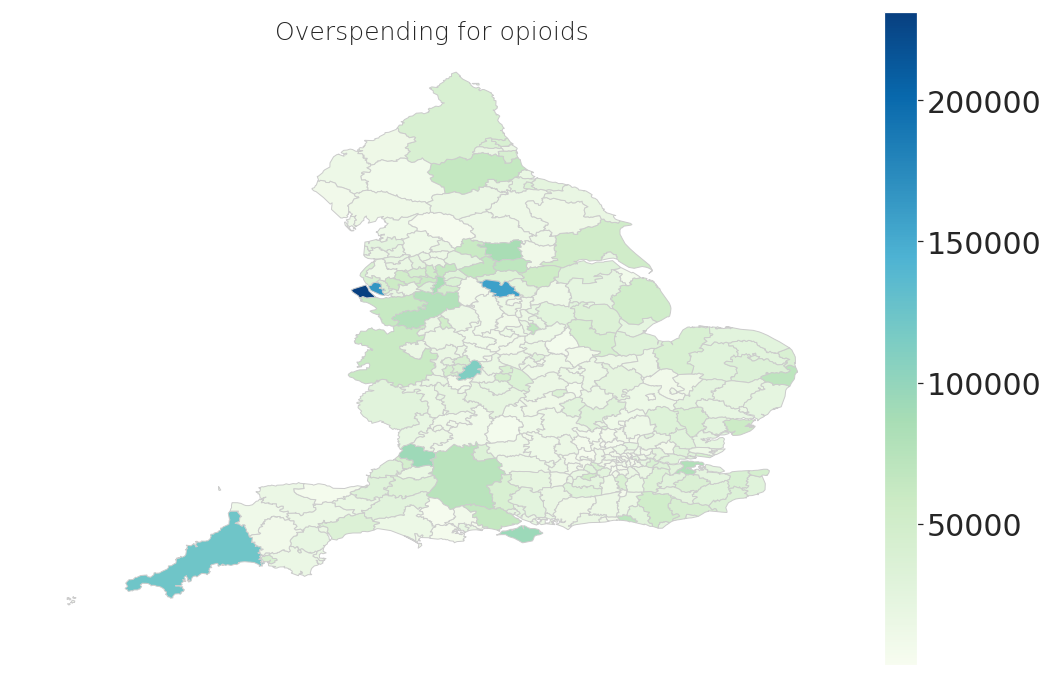

In [111]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Savings'
vmin, vmax = min(savings_df['Savings']) , max(savings_df['Savings'])

fig, ax = plt.subplots(1, figsize=(18, 12))
merged.plot(column=variable, cmap='GnBu', linewidth=1, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Overspending for opioids', fontdict={'fontsize': 25, 'fontweight' : 20})
sm = plt.cm.ScalarMappable(cmap='GnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.yaxis.offsetText.set(size=20)
cbar.ax.tick_params(labelsize=30) 

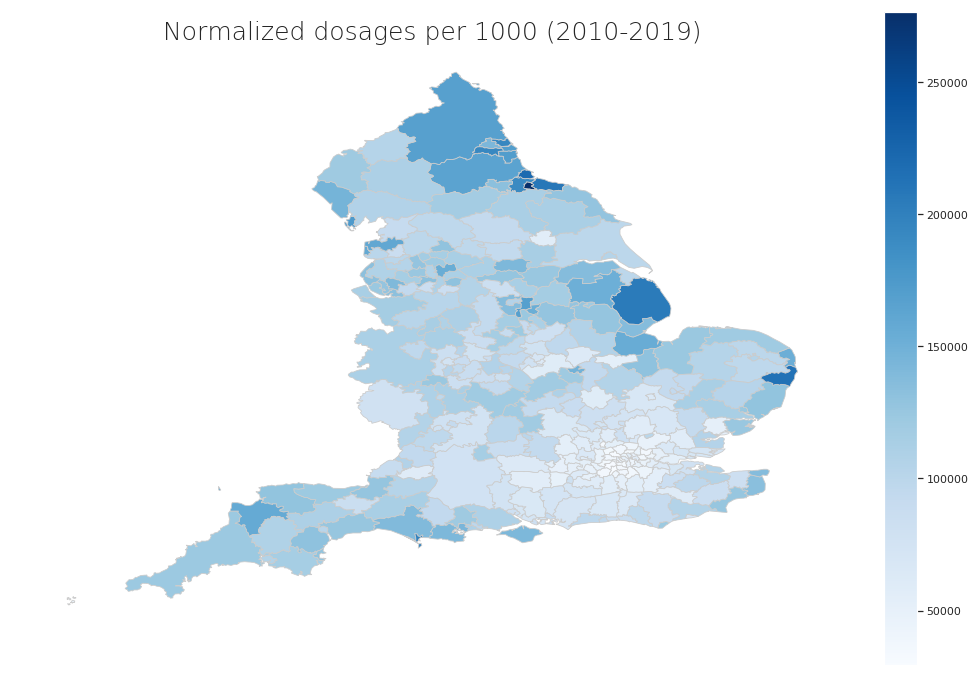

In [110]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'Dosage'
vmin, vmax = min(savings_df['Dosage']) , max(savings_df['Dosage'])

fig, ax = plt.subplots(1, figsize=(18, 12))
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Normalized dosages per 1000 (2010-2019)', fontdict={'fontsize': 25, 'fontweight' : 5})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

In [289]:
standardized_merged = merged.copy()

In [290]:
def normalize(df,feature_names):
    result = df.copy()
    for feature_name in feature_names:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [291]:
standardized_merged = normalize(merged , ['Savings','Density','Dosage','IMD','Seniors'])

In [292]:
standardized_merged.head()

,objectid,lad17cd,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,Density,Dosage,IMD,Savings,Seniors,TotalCost
lad17nm,,,,,,,,,,,,,,,,
Hartlepool,1,E06000001,None,447157,531476,-1.27023,54.676159,9.658682e+07,50245.931523,POLYGON ((-1.243847684350774 54.72307842291248...,0.067302,0.869047,0.761571,0.115447,0.502048,7.252200e+06
Middlesbrough,2,E06000002,None,451141,516887,-1.21099,54.544670,5.474167e+07,35458.505804,POLYGON ((-1.200218340036424 54.58300135026919...,0.181541,1.000000,0.951849,0.205671,0.399775,1.359218e+07
Redcar and Cleveland,3,E06000003,None,464359,519597,-1.00611,54.567520,2.471405e+08,78666.802657,(POLYGON ((-1.200218311029187 54.5830013303063...,0.037741,0.789277,0.636909,0.176974,0.605706,9.742069e+06
Stockton-on-Tees,4,E06000004,None,444937,518183,-1.30669,54.556911,2.064738e+08,86947.340766,POLYGON ((-1.193937249483723 54.62987548771687...,0.065298,0.663882,0.530334,0.186054,0.453415,1.343629e+07
Darlington,5,E06000005,None,428029,515649,-1.56835,54.535351,1.982990e+08,91341.118700,POLYGON ((-1.439939711064031 54.59520822980085...,0.036621,0.425639,0.503677,0.096231,0.520818,7.339963e+06


In [293]:
corr = pearsonr(standardized_merged['Dosage'], standardized_merged['IMD'])

Text(0.8,0.2,'Corr: 0.35')

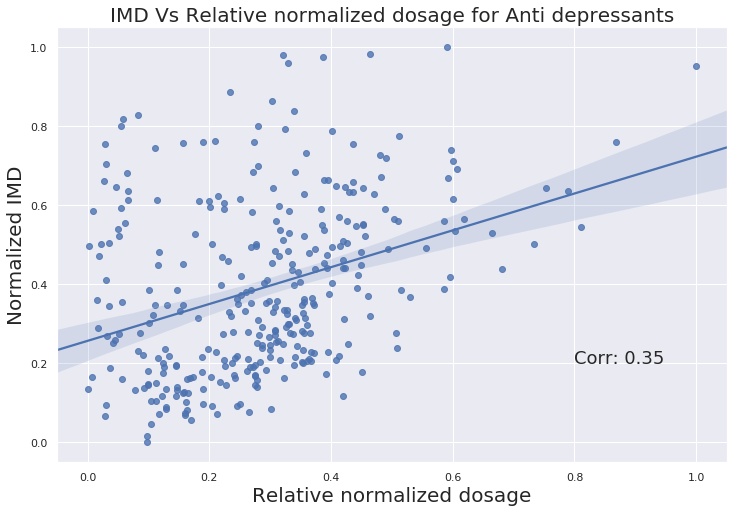

In [294]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Dosage',y='IMD',data=standardized_merged)
ax.set_title("IMD Vs Relative normalized dosage for Anti depressants" , fontsize=20)
ax.set_xlabel("Relative normalized dosage",fontsize=20)
ax.set_ylabel("Normalized IMD",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)


In [295]:
corr = pearsonr(standardized_merged['Savings'], standardized_merged['IMD'])

Text(0.8,0.2,'Corr: 0.29')

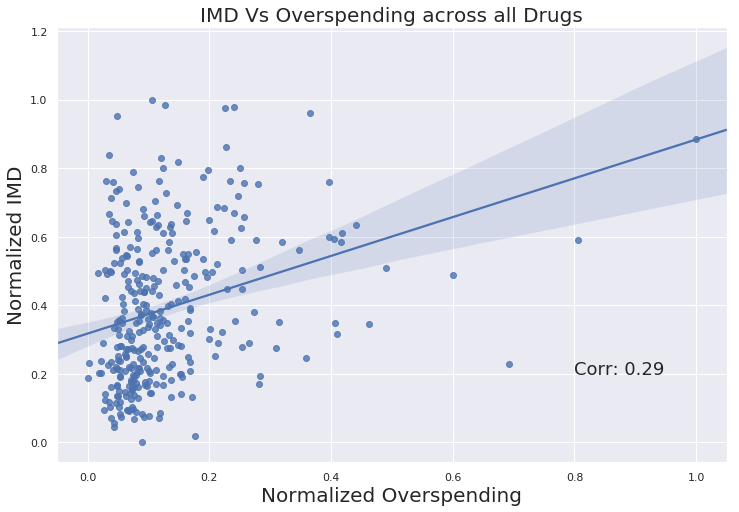

In [139]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='IMD',data=standardized_merged)
ax.set_title("IMD Vs Overspending across all Drugs" , fontsize=20)
ax.set_xlabel("Normalized Overspending",fontsize=20)
ax.set_ylabel("Normalized IMD",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)


In [140]:
corr = pearsonr(standardized_merged['Savings'], standardized_merged['Seniors'])

Text(0.8,0.2,'Corr: -0.1')

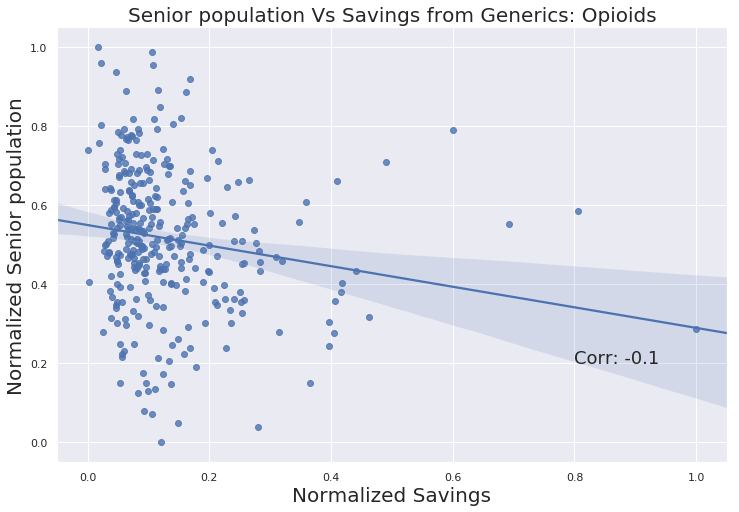

In [141]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='Seniors',data=standardized_merged)
ax.set_title("Senior population Vs Savings from Generics: Opioids" , fontsize=20)
ax.set_xlabel("Normalized Savings",fontsize=20)
ax.set_ylabel("Normalized Senior population",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.2),fontsize = 18)

In [142]:
corr=pearsonr(standardized_merged['Savings'], standardized_merged['Density'])

Text(0.8,0.8,'Corr: 0.08')

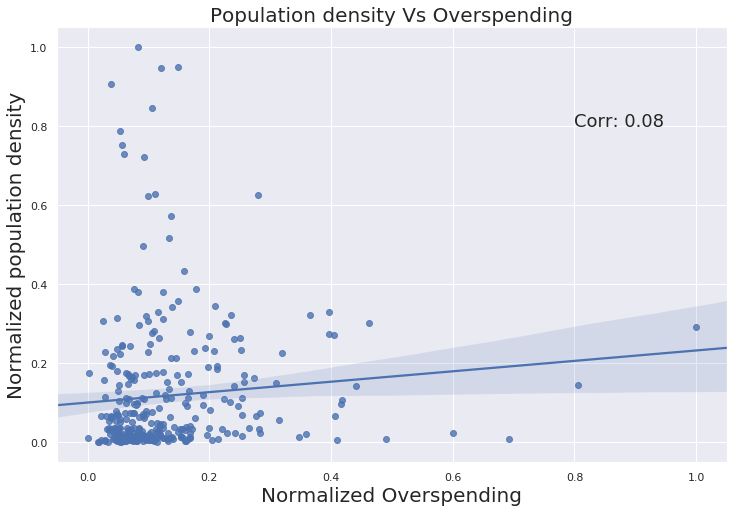

In [143]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Savings',y='Density',data=standardized_merged)
ax.set_title("Population density Vs Overspending" ,fontsize=20)
ax.set_xlabel("Normalized Overspending",fontsize=20)
ax.set_ylabel("Normalized population density",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.8),fontsize = 18)

In [144]:
corr=pearsonr(standardized_merged['Dosage'], standardized_merged['Density'])

Text(0.8,0.8,'Corr: -0.0')

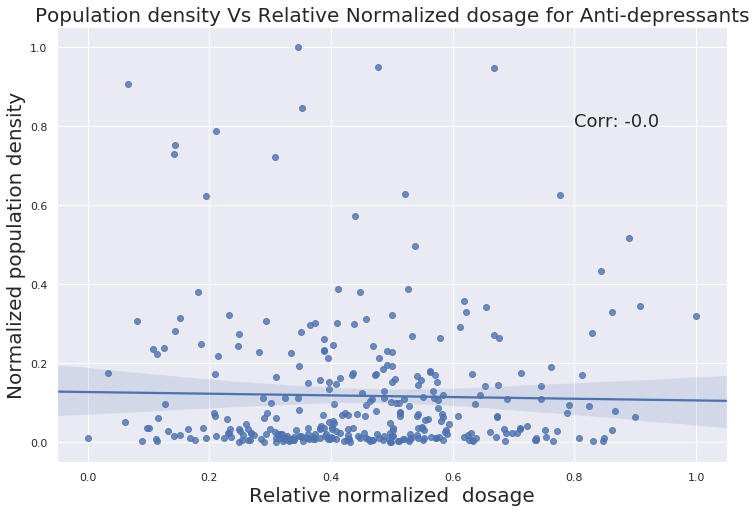

In [145]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.regplot(x='Dosage',y='Density',data=standardized_merged)
ax.set_title("Population density Vs Relative Normalized dosage for Anti-depressants" ,fontsize=20)
ax.set_xlabel("Relative normalized  dosage",fontsize=20)
ax.set_ylabel("Normalized population density",fontsize=20)
ax.annotate("Corr: " +  str(corr[0])[:4],  xy=(0.8, 0.8),fontsize = 18)


In [146]:
pearsonr(standardized_merged['Dosage'], standardized_merged['Seniors'])

(0.05405512699586862, 0.33057649643860887)

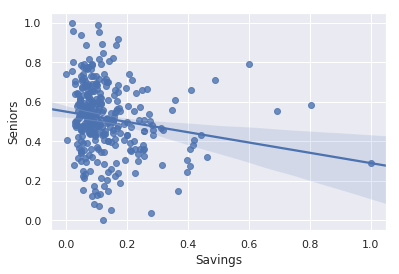

In [147]:
sns.regplot(x='Savings',y='Seniors',data=standardized_merged)

In [148]:
monthlySavings = {}
for k in monthly_borough_savings:
    monthlySavings[k] = np.median(monthly_borough_savings[k].values())
    
    
monthlyCosts = {}
for k in monthly_borough_costs:
    monthlyCosts[k] = np.median(monthly_borough_costs[k].values())

/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/home/sagar/anaconda3/envs/env_py2/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/home/sagar/anaconda3/envs/env_py2/lib/python2.7/inspect.py", line 1058, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/home/sagar/anaconda3/envs/env_py2/lib/python2.7/inspect.py", line 1018, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/home/sagar/anaconda3/envs/env_py2/lib/python2.7/inspect.py", line 453, in getsour

IndexError: string index out of range

In [119]:
months = sorted(all_overspend['savings'].keys())

In [120]:
overspend = [all_overspend['savings'][k]/1000000.0 for k in months]

Text(0,0.5,'Overspending in Million Sterling pounds')

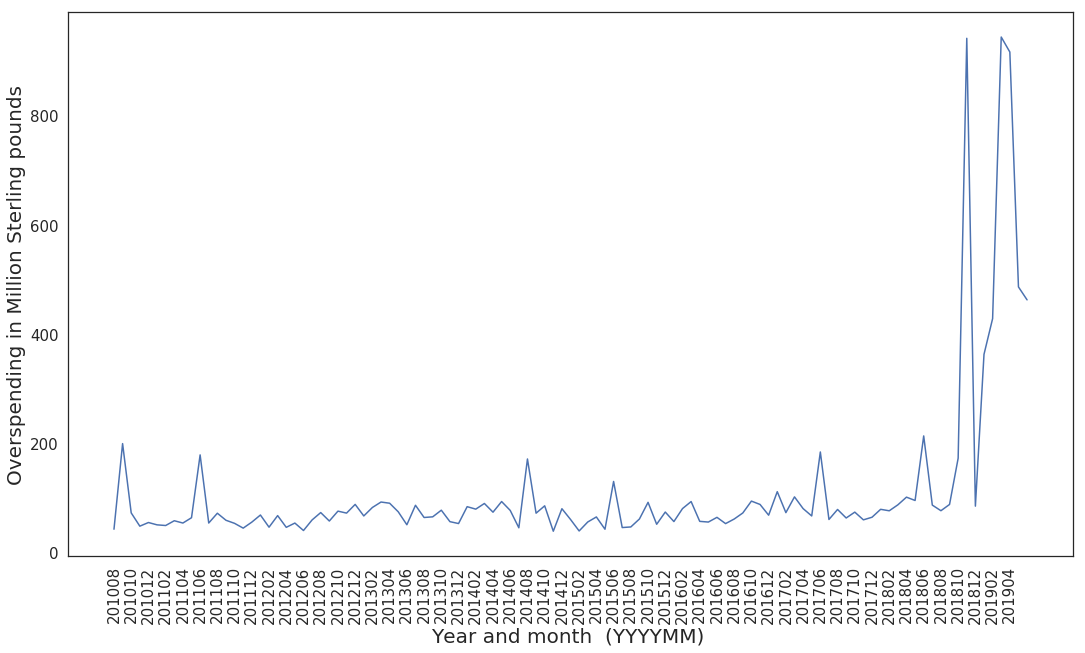

In [140]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 10)
sns.set_style("white")
sns.lineplot(y=overspend,x=np.arange(0,len(months),1))
# sns.lineplot(y=savings_df['diabetes_over'],x=np.arange(0,len(savings_df),1))
# sns.lineplot(y=savings_df['opioid_over'],x=np.arange(0,len(savings_df),1))
ax = plt.gca()

# plt.xticks(np.arange(0,len(months)+1, 2.0))
labels= [months[2*i] for i in range(0,len(months)/2)]
plt.xticks(np.arange(0,len(months) ,2),labels,rotation=90,fontsize= 15)
plt.yticks(fontsize= 15)
# plt.legend(['Overspending for Depression', 'Overspending for Diabetes', 'Overspending for Opioids'], fontsize = 16)
plt.xlabel("Year and month  (YYYYMM) ",fontsize=20)
plt.ylabel("Overspending in Million Sterling pounds",fontsize=20)
